In [1]:
import sys
sys.path.append('../')
from initial_classif.trainset.variable_training_sets import *
from initial_classif.trainset.gaia_extraction import *
import sys
from astropy.coordinates import SkyCoord
import astropy.units as u
sys.path.append('../../../../')
from virac_utils import wrap, betw, wsdb_kwargs, cm_virac, wsdb_upload_kwargs

from config import *
config=configuration()
config.request_password()

 ·············


In [92]:
config['test']

'1'

In [93]:
config['test']='0'

In [96]:
gg=grab_virac_gaia_random_sample(5,config)

In [130]:
cm_virac(gg)

,ra_,dec_,xid,sourceid,astfit_epochs,astfit_params,duplicate,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,pmra,...,j_n_b_phot,h_b_med_mag,h_b_mean_mag,h_b_ivw_mean_mag,h_b_std_mag,h_b_mad_mag,h_b_ivw_err_mag,h_n_b_phot,ks_b_med_mag,ks_b_mean_mag,ks_b_ivw_mean_mag,ks_b_std_mag,ks_b_mad_mag,ks_b_ivw_err_mag,ks_n_b_phot
0,259.859874,-38.126188,0,10175372033449,122,5,0,2014.0,259.859874,3.589435,-38.126188,2.780768,5.034413,4.905113,-4.236668,...,6,NaN,NaN,NaN,NaN,NaN,NaN,0,15.464100,15.4770,15.465800,0.080470,0.053455,0.005496,123
1,268.673324,-22.517243,1,8705009021802,190,5,0,2014.0,268.673324,2.861358,-22.517243,2.345575,-6.000692,3.448394,-0.429328,...,12,16.385599,16.485201,16.419001,0.158598,0.01583,0.019956,6,16.154301,16.1534,16.143801,0.118135,0.063034,0.006820,190


In [35]:
g2 = grab_virac_gaia_region_with_stats(1.,1.,2.5,2.5,config)

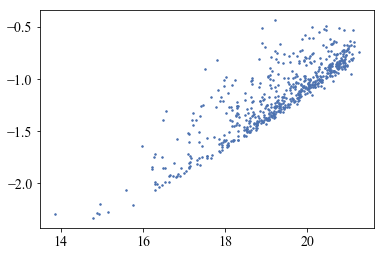

In [53]:
plt.plot(gg['phot_g_mean_mag'],np.log10(np.sqrt(gg['phot_g_n_obs'])/gg['phot_g_mean_flux_over_error']),'.',ms=3)

In [140]:
var_list = pd.read_csv('/local/scratch_2/jls/virac_classifier/variable/variable_training_set_edr3_sourceid.csv')

In [64]:
var_list_dr2 = pd.DataFrame(sqlutil.get('''select * from jason_sanders.variable_training_set_virac2_stats_with_const_sourceid;''',**wsdb_kwargs))

In [81]:
var_list_dr2_noconst = pd.DataFrame(sqlutil.get('''select sourceid as virac_id from jason_sanders.variable_training_set_virac2_stats;''',**wsdb_kwargs))

In [82]:
pp=pd.merge(var_list_dr2_noconst, var_list, how='outer', left_on='virac_id', right_on='sourceid')

In [85]:
len(pp), len(var_list_dr2_noconst), len(var_list)

(440660, 405008, 440660)

In [88]:
np.count_nonzero(pp['virac_id']!=pp['sourceid'])

35652

In [147]:
var_list[var_list['sourceid'].duplicated()]['sourceid'].values

array([9258035027359, 9778158023770, 8758205016488, 9294823035163])

In [141]:
var_list[var_list['sourceid'].duplicated()]['gaia_sourceid'].values

array([4052154034474256896, 4043185936557170560, 4116731483347876480,
       4057431174762061824])

In [245]:
var_list_g=var_list[var_list['gaia_sourceid']>=0].reset_index(drop=True)

In [246]:
np.count_nonzero(var_list_g['gaia_sourceid'].duplicated())

0

In [109]:
import sys
sys.path.append('../../../')
from virac_lc import *

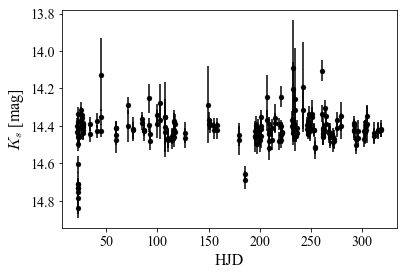

In [121]:
plot_lightcurve(load_virac_lc(9294823035163, table_version='v2_NEW'), period=161.)

In [146]:
sqlutil.upload('variable_training_set_edr3_virac2_stats_with_const_sourceid',
               [var_list['sourceid'].values, var_list['gaia_sourceid'].values,], ['virac2_id', 'gedr3_id',],**wsdb_upload_kwargs)

In [149]:
with open('/local/scratch_2/jls/virac_classifier/binary/edr3/grid.pkl', 'rb') as f:
    grid = pickle.load(f)

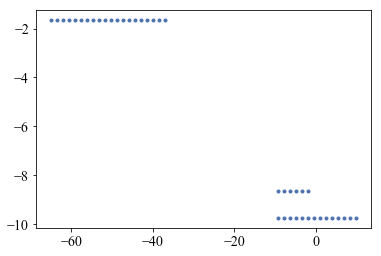

In [158]:
plt.plot(grid['l'], grid['b'], '.')

In [157]:
grid['index'].values[:250]

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [220]:
dd=grab_virac_gaia_region_with_stats(1.,1.,10.,2.,config)

/data/jls/python3.5/site-packages/sqlutilpy/sqlutil.py:398: UserWarning: Column name sourceid is repeated in the output, new name sourceid_1 assigned
  'new name %s assigned') % (_n, curn))
/data/jls/python3.5/site-packages/sqlutilpy/sqlutil.py:398: UserWarning: Column name l is repeated in the output, new name l_1 assigned
  'new name %s assigned') % (_n, curn))
/data/jls/python3.5/site-packages/sqlutilpy/sqlutil.py:398: UserWarning: Column name b is repeated in the output, new name b_1 assigned
  'new name %s assigned') % (_n, curn))
/data/jls/python3.5/site-packages/sqlutilpy/sqlutil.py:398: UserWarning: Column name sourceid is repeated in the output, new name sourceid_2 assigned
  'new name %s assigned') % (_n, curn))
/data/jls/python3.5/site-packages/sqlutilpy/sqlutil.py:398: UserWarning: Column name ks_stdev is repeated in the output, new name ks_stdev_1 assigned
  'new name %s assigned') % (_n, curn))
/data/jls/python3.5/site-packages/sqlutilpy/sqlutil.py:398: UserWarning: Colum

In [222]:
np.count_nonzero(dd['gaia_id'].duplicated())

1

In [ ]:
xmatch=sqlutil.get('''with g as (
                    select ra, dec,pmra,pmdec, source_id as gaia_id 
                            from gaia_edr3.gaia_source as t
                            where 
                            ((t.l>350 or t.l<10.8) and t.b>-10.3 and t.b<5.2)
                            or (t.l<350. and t.l>360-65.6428571434 and t.b>-1.1057142857*2 and t.b<1.1057142857*2)
                    )
                select sourceid, gaia_id, t.sep_arcsec from g
                left join lateral (
                                select sourceid, 
                                q3c_dist_pm(g.ra, g.dec, g.pmra, g.pmdec, 1, 2016., t.ra, t.dec, 2014.)*3600. as sep_arcsec
                                from leigh_smith.virac2 as t
                                where q3c_join(g.ra, g.dec, t.ra, t.dec, 2.0/3600.)
                                order by q3c_dist_pm(g.ra, g.dec, g.pmra, g.pmdec, 1, 2016., t.ra, t.dec, 2014.) asc limit 1
                                ) 
                as t on true where sourceid>0 and sep_arcsec<0.4;''',**wsdb_kwargs)

In [366]:
sqlutil.upload('virac2_gedr3_xmatch', 
               [xmatch['sourceid'],], 
               ['virac2_id',],
              **wsdb_upload_kwargs)

KeyboardInterrupt: 

In [375]:
sqlutil.upload?

Signature:
sqlutil.upload(
    tableName,
    arrays,
    names,
    db='wsdb',
    driver='psycopg2',
    user=None,
    password=None,
    host='locahost',
    conn=None,
    preamb=None,
    timeout=None,
    noCommit=False,
    temp=False,
    analyze=False,
    createTable=True,
)
Docstring:
Upload the data stored in the tuple of arrays in the DB

Parameters
----------
tableName : string
    The name of the table where the data will be uploaded
arrays : tuple
    Tuple of arrays thar will be columns of the new table
names : tuple
    Tuple of strings with column names

Examples
--------
>>> x = np.arange(10)
>>> y = x**.5
>>> sqlutil.upload('mytable',(x,y),('xcol','ycol'))
File:      /data/jls/python3.5/site-packages/sqlutilpy/sqlutil.py
Type:      function


In [357]:
sqlutil.upload('virac2_gedr3_xmatch', 
               [xmatch['sourceid'], xmatch['gaia_id'], xmatch['sep_arcsec'],], 
               ['virac2_id', 'gaia_edr3_id', 'sep_arcsec',],
              **wsdb_upload_kwargs)

DataError: invalid input syntax for integer: ""
CONTEXT:  COPY virac2_gedr3_xmatch, line 35996695, column gaia_edr3_id: ""


In [359]:
print(1)

1


In [392]:
sqlutil.get('''
                with g as (
                    select phot_g_mean_flux_over_error, phot_g_mean_mag, phot_g_n_obs, source_id as gaia_id 
                            from gaia_edr3.gaia_source as t
                            where t.l>0.825 and t.l<1.175 and t.b>1.050 and t.b<1.350
                    )
                select g.phot_g_mean_flux_over_error, g.phot_g_mean_mag, g.phot_g_n_obs, t.sourceid,t.ra,t.dec,t.l,t.b,t.ks_n_detections, s.ks_stdev,s.ks_mad,s.ks_kurtosis,s.ks_skew,s.ks_eta,s.ks_stetson_i,s.ks_stetson_j,s.ks_stetson_k,s.ks_p100,s.ks_p0,s.ks_p99,s.ks_p1,s.ks_p95,s.ks_p5,s.ks_p84,s.ks_p16,s.ks_p75,s.ks_p25, y.ks_b_ivw_err_mag,y.j_b_ivw_mean_mag,y.h_b_ivw_mean_mag,y.ks_b_ivw_mean_mag,y.ks_n_b_phot from g
                inner join jason_sanders.virac2_gedr3_xmatch as x on g.gaia_id=x.gaia_id
                inner join leigh_smith.virac2 as t on x.sourceid=t.sourceid
                inner join leigh_smith.virac2_photstats as y on y.sourceid=t.sourceid
                inner join leigh_smith.virac2_var_indices as s on s.sourceid=t.sourceid
                where phot_g_mean_mag<30 and x.sep_arcsec<0.4 
                and t.duplicate=0 and t.astfit_params=5 and t.ks_n_detections>20
                and ks_ivw_mean_mag>11.5 and ks_ivw_mean_mag<17.0
                ;
''',**wsdb_kwargs)

OrderedDict([('phot_g_mean_flux_over_error',
              array([126.971 , 354.165 , 306.324 , ...,  87.7699, 158.851 , 100.563 ],
                    dtype=float32)),
             ('phot_g_mean_mag',
              array([19.7907, 19.3637, 18.5722, ..., 20.7559, 17.5269, 20.7867],
                    dtype=float32)),
             ('phot_g_n_obs',
              array([259, 336, 402, ..., 130, 351, 160], dtype=int16)),
             ('sourceid',
              array([9200590039471, 9204687006244, 9208783004941, ..., 9184211008859,
                     9184210006660, 9180114018484])),
             ('ra',
              array([265.62672039, 265.67780416, 265.72966088, ..., 266.06019275,
                     266.02751561, 265.94296746])),
             ('dec',
              array([-27.54627669, -27.57428423, -27.6026749 , ..., -27.3723405 ,
                     -27.35452399, -27.30832679])),
             ('l',
              array([0.82499778, 0.82501065, 0.82502961, ..., 1.1749965 , 1.17498823

In [ ]:
print("""
            with g as (
                    select phot_g_mean_flux_over_error, phot_g_mean_mag, phot_g_n_obs, source_id as gaia_id 
                            from gaia_edr3.gaia_source as t
                            where t.l>0.825 and t.l<1.175 and t.b>1.050 and t.b<1.350
                    )
                select g.phot_g_mean_flux_over_error, g.phot_g_mean_mag, g.phot_g_n_obs, {0}, {1}, {6} from g
                inner join jason_sanders.virac2_gedr3_xmatch as x on g.gaia_id=x.gaia_id
                inner join leigh_smith.virac2 as t on x.sourceid=t.sourceid
                inner join leigh_smith.virac2_photstats as y on y.sourceid=t.sourceid
                inner join leigh_smith.virac2_var_indices as s on s.sourceid=t.sourceid
                where phot_g_mean_mag<30 and x.sep_arcsec<0.4 
                and t.duplicate=0 and t.astfit_params=5 and t.ks_n_detections>{2}
                and ks_ivw_mean_mag>{3} and ks_ivw_mean_mag<{4}
                ;""".format(
            main_string,
            var_string,
            np.int64(config['n_detection_threshold']),
            np.float64(config['lower_k']),
            np.float64(config['upper_k']),
            poly_string,
            phot_string,
            gaia_version,
            max_cross_match_distance))

In [25]:
dd4 = pd.DataFrame(sqlutil.get('''

select x.*,g.phot_g_mean_flux_over_error, g.phot_g_mean_mag, g.phot_g_n_obs,
                          t.ra,t.dec,t.l,t.b,t.ks_n_detections,
                          s.ks_stdev,s.ks_mad,s.ks_kurtosis,s.ks_skew,s.ks_eta,s.ks_stetson_i,s.ks_stetson_j,
                          s.ks_stetson_k,s.ks_p100,s.ks_p0,s.ks_p99,s.ks_p1,s.ks_p95,s.ks_p5,s.ks_p84,s.ks_p16,
                          s.ks_p75,s.ks_p25, y.ks_b_ivw_err_mag,y.j_b_ivw_mean_mag,y.h_b_ivw_mean_mag,
                          y.ks_b_ivw_mean_mag,y.ks_n_b_phot
                from jason_sanders.virac2_gedr3_xmatch as x
                inner join gaia_edr3.gaia_source as g on g.source_id=x.gaia_id
                inner join leigh_smith.virac2 as t on t.sourceid=x.sourceid
                inner join leigh_smith.virac2_photstats as y on y.sourceid=x.sourceid
                inner join leigh_smith.virac2_var_indices as s on s.sourceid=x.sourceid
                
                where phot_g_mean_mag<30 and t.duplicate=0 and t.astfit_params=5 and t.ks_n_detections>20
                and t.ks_ivw_mean_mag>11.5 and t.ks_ivw_mean_mag<17.0 limit 30
''', **wsdb_kwargs))

In [26]:
len(dd4.columns)

34

In [27]:
dd4.columns

Index(['sourceid', 'gaia_id', 'sep_arcsec', 'phot_g_mean_flux_over_error',
       'phot_g_mean_mag', 'phot_g_n_obs', 'ra', 'dec', 'l', 'b',
       'ks_n_detections', 'ks_stdev', 'ks_mad', 'ks_kurtosis', 'ks_skew',
       'ks_eta', 'ks_stetson_i', 'ks_stetson_j', 'ks_stetson_k', 'ks_p100',
       'ks_p0', 'ks_p99', 'ks_p1', 'ks_p95', 'ks_p5', 'ks_p84', 'ks_p16',
       'ks_p75', 'ks_p25', 'ks_b_ivw_err_mag', 'j_b_ivw_mean_mag',
       'h_b_ivw_mean_mag', 'ks_b_ivw_mean_mag', 'ks_n_b_phot'],
      dtype='object')

In [28]:
dd2.columns

Index(['phot_g_mean_flux_over_error', 'phot_g_mean_mag', 'phot_g_n_obs',
       'gaia_id', 'sep_arcsec', 'sourceid', 'ra', 'dec', 'l', 'b',
       'ks_n_detections', 'ks_stdev', 'ks_mad', 'ks_kurtosis', 'ks_skew',
       'ks_eta', 'ks_stetson_i', 'ks_stetson_j', 'ks_stetson_k', 'ks_p100',
       'ks_p0', 'ks_p99', 'ks_p1', 'ks_p95', 'ks_p5', 'ks_p84', 'ks_p16',
       'ks_p75', 'ks_p25', 'ks_b_ivw_err_mag', 'j_b_ivw_mean_mag',
       'h_b_ivw_mean_mag', 'ks_b_ivw_mean_mag', 'ks_n_b_phot'],
      dtype='object')

In [22]:
len(dd2.columns)

34

In [36]:
dd2=grab_virac_gaia_region_with_stats(330.,0.5,0.2*60,0.2*60,config)

In [37]:
len(dd2)

5209

In [ ]:
with q as (
            with g as (
                with g as (
                    select phot_g_mean_flux_over_error, phot_g_mean_mag, phot_g_n_obs, source_id as gaia_id 
                            from gaia_edr3.gaia_source as t
                            where t.l>2.950 and t.l<3.050 and t.b>0.250 and t.b<0.350
                    )
                select g.phot_g_mean_flux_over_error, g.phot_g_mean_mag, g.phot_g_n_obs, x.sourceid, x.sep_arcsec from g
                inner join jason_sanders.virac2_gedr3_xmatch as x on g.gaia_id=x.gaia_id
                where phot_g_mean_mag<30 and x.sep_arcsec<0.4 
                )
                select g.phot_g_mean_flux_over_error, g.phot_g_mean_mag, g.phot_g_n_obs, g.sep_arcsec, t.sourceid,t.ra,t.dec,t.l,t.b,t.ks_n_detections from g
                inner join leigh_smith.virac2 as t on g.sourceid=t.sourceid
                and t.duplicate=0 and t.astfit_params=5 and t.ks_n_detections>20
                and ks_ivw_mean_mag>11.5 and ks_ivw_mean_mag<17.0
                )
            select q.*, s.ks_stdev,s.ks_mad,s.ks_kurtosis,s.ks_skew,s.ks_eta,s.ks_stetson_i,s.ks_stetson_j,s.ks_stetson_k,s.ks_p100,s.ks_p0,s.ks_p99,s.ks_p1,s.ks_p95,s.ks_p5,s.ks_p84,s.ks_p16,s.ks_p75,s.ks_p25, y.ks_b_ivw_err_mag,y.j_b_ivw_mean_mag,y.h_b_ivw_mean_mag,y.ks_b_ivw_mean_mag,y.ks_n_b_phot from q
                inner join leigh_smith.virac2_photstats as y on q.sourceid=y.sourceid
                inner join leigh_smith.virac2_var_indices as s on q.sourceid=s.sourceid
                ;

In [ ]:
with q as (
with t as (
            with g as (
                with g as (
                    select phot_g_mean_flux_over_error, phot_g_mean_mag, phot_g_n_obs, source_id as gaia_id 
                            from gaia_edr3.gaia_source as t
                            where t.l>3.950 and t.l<4.050 and t.b>2.450 and t.b<2.550
                    )
                select g.phot_g_mean_flux_over_error, g.phot_g_mean_mag, g.phot_g_n_obs, x.sourceid, x.sep_arcsec from g
                inner join jason_sanders.virac2_gedr3_xmatch as x on g.gaia_id=x.gaia_id
                where phot_g_mean_mag<30
                )
                select g.phot_g_mean_flux_over_error, g.phot_g_mean_mag, g.phot_g_n_obs, g.sep_arcsec, 
                        t.sourceid,t.ra,t.dec,t.l,t.b,t.ks_n_detections,t.duplicate,t.astfit_params,t.ks_ivw_mean_mag,
                        s.ks_stdev,s.ks_mad,s.ks_kurtosis,s.ks_skew,s.ks_eta,s.ks_stetson_i,s.ks_stetson_j,s.ks_stetson_k,
                        s.ks_p100,s.ks_p0,s.ks_p99,s.ks_p1,s.ks_p95,s.ks_p5,s.ks_p84,s.ks_p16,s.ks_p75,s.ks_p25, 
                        y.ks_b_ivw_err_mag,y.j_b_ivw_mean_mag,y.h_b_ivw_mean_mag,y.ks_b_ivw_mean_mag,y.ks_n_b_phot from g
                inner join leigh_smith.virac2 as t on g.sourceid=t.sourceid
                inner join leigh_smith.virac2_photstats as y on g.sourceid=y.sourceid
                inner join leigh_smith.virac2_var_indices as s on g.sourceid=s.sourceid
            )
                select t.phot_g_mean_flux_over_error, t.phot_g_mean_mag, t.phot_g_n_obs, t.sep_arcsec, 
                        t.sourceid,t.ra,t.dec,t.l,t.b,t.ks_n_detections from t
                where t.duplicate=0 and t.astfit_params=5 and t.ks_n_detections>20
                and ks_ivw_mean_mag>11.5 and ks_ivw_mean_mag<17.0
                )
            select q.*, 
                ;

In [3]:
len(dd2)

778

[]

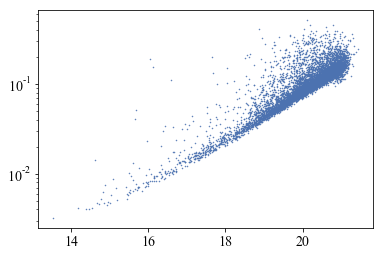

In [253]:
plt.plot(dd2['phot_g_mean_mag'],np.sqrt(dd2['phot_g_n_obs'])/dd2['phot_g_mean_flux_over_error'],'.',ms=1)
plt.semilogy()

In [241]:
np.count_nonzero(dd2['gaia_id'].duplicated())

0